# 請先上傳AutoPreprocess.py以及healthcare_test.csv還有model.bin

# 測試

In [1]:
#載入測試用資料
import pandas as pd
import numpy as np
data = pd.read_csv('/content/healthcare_test.csv')   # <- 這邊要改成實際的檔案
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,3777,Female,28.0,1,0,Yes,Govt_job,Rural,83.66,36.4,never smoked,0
1,8277,Female,3.0,0,0,No,children,Urban,93.30,19.5,Unknown,0
2,58282,Female,53.0,0,0,Yes,Govt_job,Rural,64.40,31.0,smokes,0
3,46488,Male,35.0,0,0,Yes,Private,Rural,69.22,42.8,never smoked,0
4,8831,Female,58.0,0,0,Yes,Private,Rural,94.30,29.1,Unknown,0


In [2]:
# 載入前處理模型並轉換資料
X = data
y = data['stroke']  # <- 這邊要改成實際的類別欄位

In [3]:
# 載入模型
import pickle
f =  open("model.bin", "rb")  # <- 這邊要改成實際的檔案
model =  pickle.load(f)
model

Pipeline(steps=[('AutoPreprocess', AutoPreprocess()),
                ('model',
                 RandomForestClassifier(class_weight={0: 1, 1: 50}, max_depth=5,
                                        min_samples_leaf=4,
                                        min_samples_split=15, n_estimators=50,
                                        random_state=42))])

測試組 Accuracy: 0.5792563600782779
測試組 Balanced Accuracy: 0.7124074074074074
測試組 F1: 0.4426265270506108
測試組 Precision: 0.539842375027017
測試組 Recall: 0.7124074074074074
測試組 ROC AUC: 0.7893621399176954


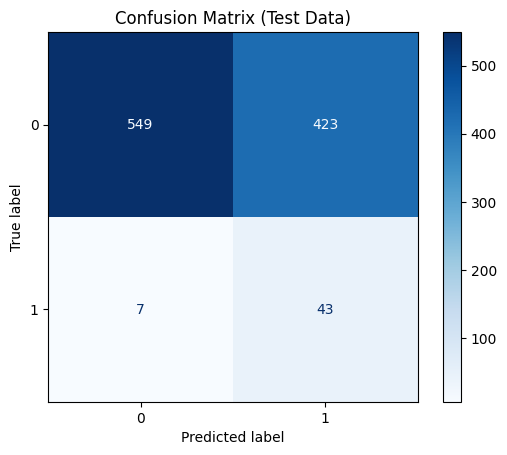

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, balanced_accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score
)

# 取得分類預測
y_pred = model.predict(X) # Removed [:, 1]

print("測試組 Accuracy:", accuracy_score(y, y_pred))
print("測試組 Balanced Accuracy:", balanced_accuracy_score(y, y_pred))
print("測試組 F1:", f1_score(y, y_pred, average='macro'))
print("測試組 Precision:", precision_score(y, y_pred, average='macro'))
print("測試組 Recall:", recall_score(y, y_pred, average='macro'))

# roc_auc_score 必須用機率值
try:
    y_prob = model.predict_proba(X)[:, 1]
    print("測試組 ROC AUC:", roc_auc_score(y, y_prob))
except AttributeError:
    print("模型沒有 predict_proba，無法計算 ROC AUC")


# 計算混淆矩陣
cm = confusion_matrix(y, y_pred)

# 畫出混淆矩陣
# disp = ConfusionMatrixDisplay(confusion_matrix=cm) # <- 如果模型沒有類別名稱選這個
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Test Data)")
plt.show()

In [ ]:
import plotly.express as px
import numpy as np

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score, balanced_accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score
)

# 取得分類預測
y_pred = model.predict(X)

print("測試組 Accuracy:", accuracy_score(y, y_pred))
print("測試組 Balanced Accuracy:", balanced_accuracy_score(y, y_pred))
print("測試組 F1:", f1_score(y, y_pred, average='macro'))
print("測試組 Precision:", precision_score(y, y_pred, average='macro'))
print("測試組 Recall:", recall_score(y, y_pred, average='macro'))

# roc_auc_score 必須用機率值
try:
    y_prob = model.predict_proba(X)[:, 1] # Select probabilities for the positive class (stroke=1)
    print("測試組 ROC AUC:", roc_auc_score(y, y_prob)) # Removed multi_class and average
except AttributeError:
    print("模型沒有 predict_proba，無法計算 ROC AUC")


# 計算混淆矩陣
cm = confusion_matrix(y, y_pred)
labels = model.classes_  # pipeline 最後分類器的類別

# 轉成 DataFrame
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# 用 Plotly 畫熱力圖
fig = px.imshow(
    cm_df,
    text_auto=True,       # 顯示數字
    color_continuous_scale="Blues",
    labels=dict(x="Predicted Label", y="True Label", color="Count"),
)

fig.update_layout(
    title="Confusion Matrix",
    xaxis_title="Predicted Label",
    yaxis_title="True Label"
)

fig.show()

測試組 Accuracy: 0.5792563600782779
測試組 Balanced Accuracy: 0.7124074074074074
測試組 F1: 0.4426265270506108
測試組 Precision: 0.539842375027017
測試組 Recall: 0.7124074074074074
測試組 ROC AUC: 0.7893621399176954


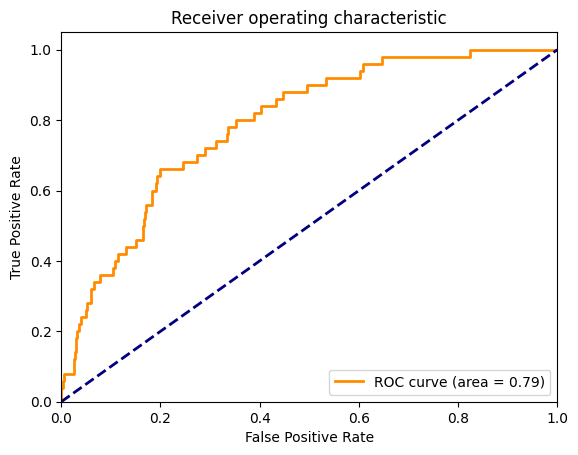

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# 將預測結果回存
data['預測'] = y_pred
data.to_csv("預測結果.csv")
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,預測
0,3777,Female,28.0,1,0,Yes,Govt_job,Rural,83.66,36.4,never smoked,0,0
1,8277,Female,3.0,0,0,No,children,Urban,93.30,19.5,Unknown,0,0
2,58282,Female,53.0,0,0,Yes,Govt_job,Rural,64.40,31.0,smokes,0,1
3,46488,Male,35.0,0,0,Yes,Private,Rural,69.22,42.8,never smoked,0,0
4,8831,Female,58.0,0,0,Yes,Private,Rural,94.30,29.1,Unknown,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,11539,Female,24.0,1,0,No,Private,Urban,107.22,35.3,smokes,0,0
1018,68995,Female,48.0,1,0,No,Private,Rural,118.14,NaN,formerly smoked,0,0
1019,14444,Female,37.0,0,0,No,Self-employed,Urban,90.71,45.8,Unknown,0,0
1020,70625,Male,18.0,0,0,No,Private,Urban,79.35,23.6,Unknown,0,0


# Gradio介面

In [ ]:
import gradio as gr
import pickle
import pandas as pd

# 載入模型
with open("model.bin", "rb") as f:
    model = pickle.load(f)

# 映射字典
是否結過婚_map = {"有": "Yes", "無": "No"}
工作類型_map = {
    "children (我是小孩)": "children",
    "Govt_job (我是公務員)": "Govt_job",
    "Never_worked (我從未工作過)": "Never_worked",
    "Private (我在私營/私企上班)": "Private",
    "Self-employed (自僱)": "Self-employed",
}
居住類型_map = {"Rural (鄉村)": "Rural", "Urban (城市)": "Urban"}
性別_map = {"Male (男)": "Male", "Female (女)": "Female"}
高血壓_map = {"有": 1, "無": 0}
心臟病_map = {"有": 1, "無": 0}
吸菸狀態_map = {
    "formerly smoked (曾經吸菸)": "formerly smoked",
    "never smoked (從未吸菸)": "never smoked",
    "smokes (目前吸菸)": "smokes",
    "Unknown (未知)": "Unknown",
}

# 預測函式
def pred(年齡, 是否結過婚, 工作類型, 平均血糖值, 居住類型, 性別, 高血壓, 心臟病, 體重指數, 吸菸狀態):
    data_dict = {
        "age": 年齡,
        "ever_married": 是否結過婚_map.get(是否結過婚, 是否結過婚),
        "work_type": 工作類型_map.get(工作類型, 工作類型),
        "avg_glucose_level": 平均血糖值,
        "Residence_type": 居住類型_map.get(居住類型, 居住類型),
        "gender": 性別_map.get(性別, 性別),
        "hypertension": 高血壓_map.get(高血壓, 0),
        "heart_disease": 心臟病_map.get(心臟病, 0),
        "bmi": 體重指數,
        "smoking_status": 吸菸狀態_map.get(吸菸狀態, 吸菸狀態),
    }

    df = pd.DataFrame([data_dict])  # 轉成 DataFrame
    y_pred = model.predict(df)[0]   # 取第一筆預測

    return f'預測結果: {"⚠️ 高風險 (可能有中風風險)" if y_pred == 1 else "✅ 低風險 (中風風險較低)"}'


# Gradio 介面
with gr.Blocks() as demo:
    gr.Markdown("🧑‍⚕️ 中風風險預測")

    input_option = []
    input_option.append(gr.Number(label="年齡", maximum=100, minimum=1, step=1, value=30))
    input_option.append(gr.Radio(["有", "無"], label="是否結過婚"))
    input_option.append(gr.Dropdown(
        ["Private (我在私營/私企上班)", "children (我是小孩)", "Govt_job (我是公務員)",
         "Never_worked (我從未工作過)", "Self-employed (自僱)"],
        label="工作類型"))
    input_option.append(gr.Number(label="平均血糖值", maximum=300, minimum=50, step=10, value=100))
    input_option.append(gr.Radio(["Rural (鄉村)", "Urban (城市)"], label="居住類型"))

    with gr.Accordion("進階選項", open=False):
        input_option.append(gr.Radio(["Male (男)", "Female (女)"], label="性別"))
        input_option.append(gr.Radio(["有", "無"], label="高血壓"))
        input_option.append(gr.Radio(["有", "無"], label="心臟病"))
        input_option.append(gr.Number(label="體重指數(BMI)", maximum=100, minimum=10, step=1, value=22))
        input_option.append(gr.Dropdown(
            ["never smoked (從未吸菸)", "formerly smoked (曾經吸菸)",
             "smokes (目前吸菸)", "Unknown (未知)"],
            label="吸菸狀態"))

    pred_button = gr.Button("預測")
    output = gr.Textbox(label="預測結果")
    pred_button.click(fn=pred, inputs=input_option, outputs=output)

demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://325bb18464260b248a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
